In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.linear_model import LogisticRegression

In [66]:
#Load the data set
claimants = pd.read_csv(r"C:\Users\Reliance\Downloads\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [67]:
claimants.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177
1339,34153,1,1.0,1.0,0.0,30.0,0.688


In [86]:
claimants.drop(["CASENUM"],inplace=True,axis=1)

In [87]:
claimants.shape

(1096, 6)

In [88]:
#Shape of the data set
claimants.shape

(1096, 6)

In [89]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1096 non-null   float64
 1   CLMSEX    1096 non-null   float64
 2   CLMINSUR  1096 non-null   float64
 3   SEATBELT  1096 non-null   float64
 4   CLMAGE    1096 non-null   float64
 5   LOSS      1096 non-null   float64
dtypes: float64(6)
memory usage: 59.9 KB


In [90]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [91]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,0.0,1.0,0.0,50.0,9.11625
1,1.0,1.0,1.0,0.0,18.0,0.89100
2,1.0,0.0,1.0,0.0,5.0,0.33000
3,0.0,0.0,1.0,0.0,31.0,0.03700
4,1.0,0.0,1.0,0.0,30.0,0.03800


In [92]:
#find duplicates values
claimants[claimants.duplicated()] 

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
242,0.0,0.0,1.0,0.0,41.0,9.11625
439,1.0,0.0,1.0,0.0,57.0,3.88900
599,0.0,1.0,1.0,0.0,37.0,9.11625
759,0.0,0.0,1.0,0.0,30.0,9.11625
787,0.0,0.0,1.0,0.0,50.0,9.11625
834,0.0,1.0,1.0,0.0,48.0,1.05000
866,1.0,1.0,1.0,0.0,30.0,0.30000
886,0.0,0.0,1.0,0.0,30.0,9.11625
942,0.0,1.0,1.0,0.0,8.0,0.10000
961,0.0,1.0,1.0,0.0,40.0,9.11625


In [93]:
claimants.duplicated().sum()

20

In [94]:
#find missing values
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

array([[<Axes: title={'center': 'ATTORNEY'}>,
        <Axes: title={'center': 'CLMSEX'}>],
       [<Axes: title={'center': 'CLMINSUR'}>,
        <Axes: title={'center': 'SEATBELT'}>],
       [<Axes: title={'center': 'CLMAGE'}>,
        <Axes: title={'center': 'LOSS'}>]], dtype=object)

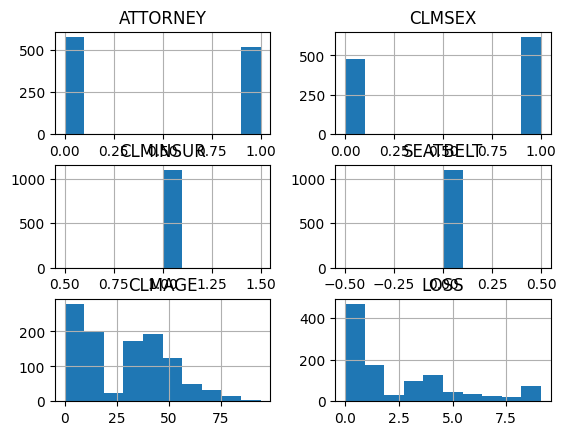

In [95]:
claimants.hist()

<Axes: >

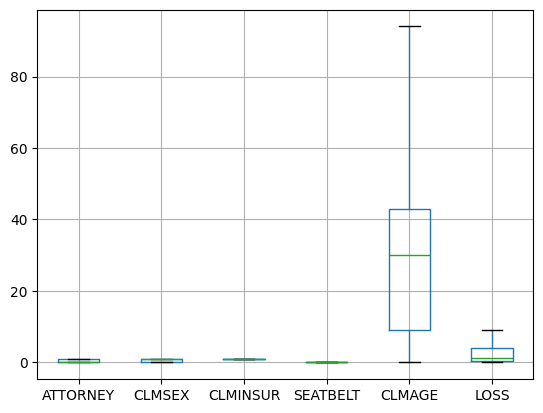

In [96]:
#find outliers #not found any outliers
claimants.boxplot()

In [100]:
#apply logistic regression
# Dividing our data into input and output variables
X = claimants.iloc[:,1:] # Indepedendent variable set - CLMSEX	CLMINSUR	SEATBELT	CLMAGE	LOSS
Y = claimants.iloc[:,0] # Dependent variable set - ATTORNEY

In [101]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,9.11625
1,1.0,1.0,0.0,18.0,0.89100
2,0.0,1.0,0.0,5.0,0.33000
3,0.0,1.0,0.0,31.0,0.03700
4,0.0,1.0,0.0,30.0,0.03800
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.06000
1336,1.0,1.0,0.0,46.0,3.70500
1337,1.0,1.0,0.0,39.0,0.09900
1338,1.0,1.0,0.0,8.0,3.17700


In [102]:
Y

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1334    1.0
1336    0.0
1337    1.0
1338    0.0
1339    1.0
Name: ATTORNEY, Length: 1096, dtype: float64

In [103]:
#Logistic regression and fit the model
classifier = LogisticRegression() # initialize the model i.e. called instance creation of class object.
# First create object 'classifier' for class LogisticRegression
classifier.fit(X,Y) # Then use this object to fit the model. This is the std methodology to build any algo. in sklearn

LogisticRegression()

In [104]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [105]:
y_pred # y hat values for x

array([0., 1., 1., ..., 1., 0., 1.])

In [109]:
y_pred_df= pd.DataFrame({'Y': Y,'Yhat': classifier.predict(X)}) # OR 'Yhat': y_pred

In [110]:
y_pred_df

,Y,Yhat
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,1.0
4,1.0,1.0
...,...,...
1334,1.0,1.0
1336,0.0,0.0
1337,1.0,1.0
1338,0.0,0.0


In [111]:
# Confusion Matrix for the model accuracy  TP   FP
#                                          FN   TN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[368 210]
 [111 407]]


In [112]:
((381+395)/(381+197+123+395))*100 #Accuracy

70.8029197080292

In [113]:
# ROC Curve

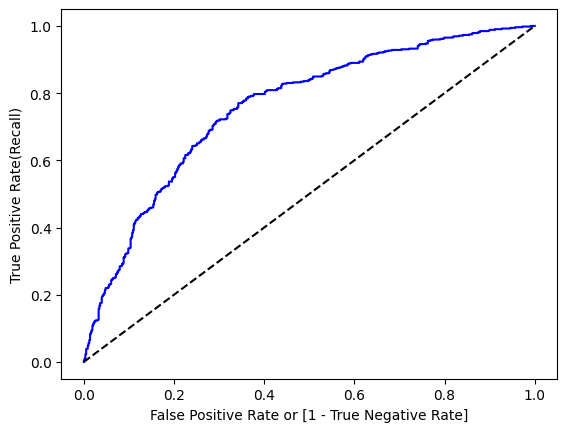

In [114]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

# here we will get false positive rate, true positive rate and threshold values
# FPR indicates how often a model incorrectly labels a negative instance as positive. FPR = FP / (FP + TN)
# TPR indicates how well a model identifies positive instances. TPR = TP / (TP + FN)
# Thresholds: The values of the predicted probabilities or scores that separate positive from negative classifications.
auc = roc_auc_score(Y, y_pred)# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate(Recall)')
plt.show() # red one is roc curve


In [115]:
auc

0.7111962432031635